<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Distribuci%C3%B3n_Triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Resultados empíricos ===
Media empírica: 3.0235
Desviación estándar empírica: 0.8152

=== Resultados teóricos ===
Media teórica: 3.0000
Desviación estándar teórica: 0.8165


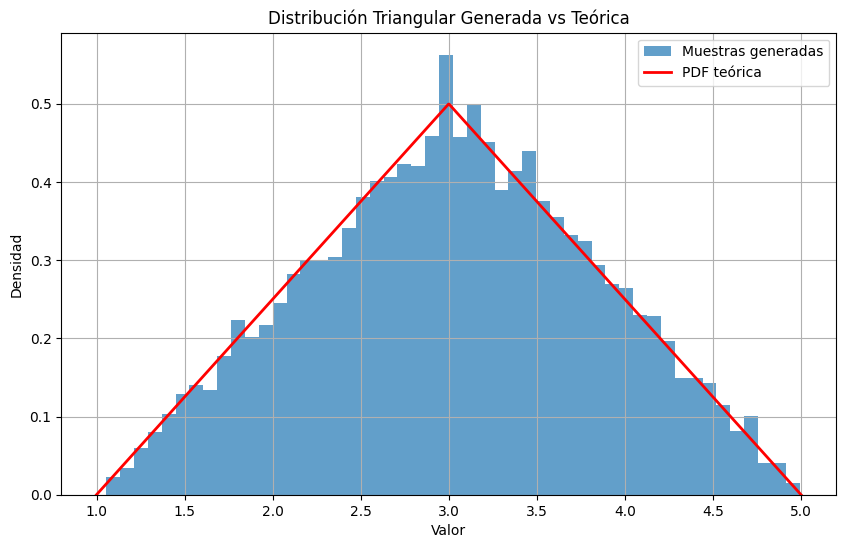


=== Comparación de resultados ===
                          Teórico         Empírico        Diferencia     
Media                     3.0000          3.0235          0.0235
Desviación estándar       0.8165          0.8152          0.0013


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
a = 1  # límite inferior
b = 5  # límite superior
c = 3  # moda (debe estar entre a y b)
size = 10000  # Número de muestras a generar

# Verificación de parámetros
if not a <= c <= b:
    raise ValueError("Los parámetros deben cumplir a ≤ c ≤ b")

def generar_triangular(a, b, c, size=1):
    """
    Genera muestras de una distribución triangular usando transformada inversa

    Parámetros:
    a -- límite inferior
    b -- límite superior
    c -- moda (debe estar entre a y b)
    size -- número de muestras a generar

    Modifiqué los parámetros para que sean compatibles con la distribución triangular de SciPy
    """
    muestras = np.zeros(size)
    u = np.random.uniform(0, 1, size)
    uc = (c - a) / (b - a)  # Punto crítico

    # Aplicamos la transformada inversa por partes
    mask = u <= uc
    muestras[mask] = a + np.sqrt(u[mask] * (b - a) * (c - a))
    muestras[~mask] = b - np.sqrt((1 - u[~mask]) * (b - a) * (b - c))

    return muestras

# Generamos las muestras
muestras = generar_triangular(a, b, c, size)

# Cálculo de estadísticos empíricos
media_empirica = np.mean(muestras)
std_empirica = np.std(muestras)

print("=== Resultados empíricos ===")
print(f"Media empírica: {media_empirica:.4f}")
print(f"Desviación estándar empírica: {std_empirica:.4f}")

# Cálculo de estadísticos teóricos
media_teorica = (a + b + c) / 3
varianza_teorica = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teorica = np.sqrt(varianza_teorica)

print("\n=== Resultados teóricos ===")
print(f"Media teórica: {media_teorica:.4f}")
print(f"Desviación estándar teórica: {std_teorica:.4f}")

# Visualización del histograma
x = np.linspace(a, b, 1000)
c_scipy = (c - a) / (b - a)
pdf_teorica = triang.pdf(x, c=c_scipy, loc=a, scale=b-a)

plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.7, label='Muestras generadas')
plt.plot(x, pdf_teorica, 'r-', lw=2, label='PDF teórica')
plt.title('Distribución Triangular Generada vs Teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Comparación de resultados
print("\n=== Comparación de resultados ===")
print(f"{'':<25} {'Teórico':<15} {'Empírico':<15} {'Diferencia':<15}")
print(f"{'Media':<25} {media_teorica:<15.4f} {media_empirica:<15.4f} {abs(media_teorica-media_empirica):.4f}")
print(f"{'Desviación estándar':<25} {std_teorica:<15.4f} {std_empirica:<15.4f} {abs(std_teorica-std_empirica):.4f}")